In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import scipy.stats as stats
from pylab import *
from scipy.io import loadmat

In [2]:
df=pd.read_csv("Ber2.csv", parse_dates=['Date Time'], header=int(0))

In [3]:
df.head()

,Date Time,Water Level,Sigma,I,L
0,2017-01-01 00:00:00,0.544,0.024,0,0
1,2017-01-01 01:00:00,0.689,0.023,0,0
2,2017-01-01 02:00:00,0.739,0.023,0,0
3,2017-01-01 03:00:00,0.698,0.000,1,0
4,2017-01-01 04:00:00,0.594,0.016,0,0


In [4]:
df.columns = ['Date Time', 'Water Level','Sigma','I','L']

In [5]:
df1=df.loc[:, 'Date Time':'Water Level']

In [6]:
df1.head()

,Date Time,Water Level
0,2017-01-01 00:00:00,0.544
1,2017-01-01 01:00:00,0.689
2,2017-01-01 02:00:00,0.739
3,2017-01-01 03:00:00,0.698
4,2017-01-01 04:00:00,0.594


In [7]:
df1

,Date Time,Water Level
0,2017-01-01 00:00:00,0.544
1,2017-01-01 01:00:00,0.689
2,2017-01-01 02:00:00,0.739
3,2017-01-01 03:00:00,0.698
4,2017-01-01 04:00:00,0.594
5,2017-01-01 05:00:00,0.399
6,2017-01-01 06:00:00,0.222
7,2017-01-01 07:00:00,0.099
8,2017-01-01 08:00:00,0.058
9,2017-01-01 09:00:00,0.131


In [8]:
df1.dtypes

Date Time      datetime64[ns]
Water Level           float64
dtype: object

C:\Users\tzitzin\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


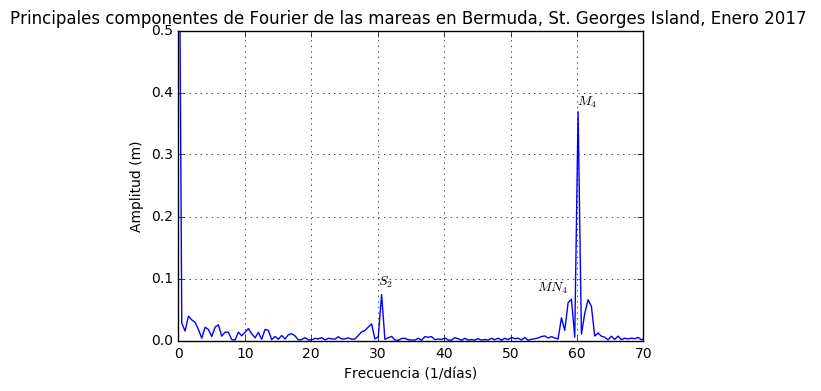

In [9]:
import numpy as np
from scipy.fftpack import rfft
N=744
T=1.0/372.0
x=df1[u'Date Time']
y=df1[u'Water Level']
yf=rfft(y)
xf=np.linspace(0.0,1.0/(2.0*T),N/2)
import matplotlib.pyplot as plt
plt.plot(xf,2.0/N* np.abs(yf[0:N/2]))
plt.xlim(0,70)
plt.ylim(0,0.5)
plt.grid()
plt.title("Principales componentes de Fourier de las mareas en Bermuda, St. Georges Island, Enero 2017 ")
plt.ylabel('Amplitud (m)')
plt.xlabel('Frecuencia (1/días)')
plt.text(30, 0.09, '$S_2$')
plt.text(54, 0.08, '$MN_4$')
plt.text(60, 0.38, '$M_4$')
#plt.text(62, 18, '$S_4$')
plt.show()

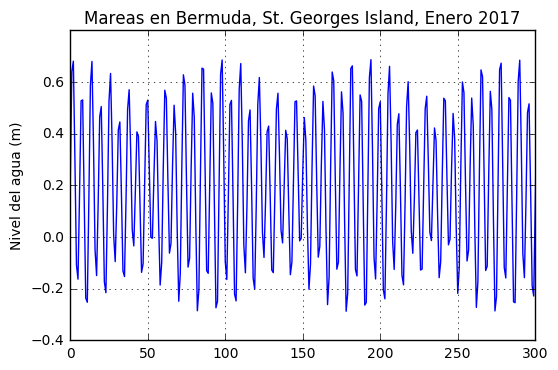

In [46]:
import math 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot 

#Funcion
def f1(x): 
    return 0.2+0.09*math.sin(2*3.1416*x/12)+0.08*math.sin(2*3.1416*x/6.4138)+0.38*math.sin(2*3.1416*x/6)

# Graficar 
pyplot.plot(x, [f1(i) for i in x]) 
plt.title("Mareas en Bermuda, St. Georges Island, Enero 2017")
plt.ylabel('Nivel del agua (m)')

pyplot.xlim(0, 300) 
pyplot.ylim(-0.4, 0.8) 

# Guardar grafica
pyplot.savefig("output.png") 
 
plt.grid(True)
pyplot.show()